In [1]:
#!/usr/bin/python
import os
import pandas as pd
import numpy as np
import cv2
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import reverse_geocode
import glob
import math
import json

In [2]:
dest = './image_labeled_input'
src = './images'
random_image = 'DJI_0001'
sub_images_json = './images_and_json/' + random_image
path_forest = './forests/' + random_image + '.jpg'
print(path_forest)
with open(sub_images_json + '/json.txt') as f:
  data = json.load(f)

print(data['image'])
trees = data['trees']

#print(trees)
#print(json.dumps(data, indent = 4, sort_keys=True))
for tree in trees:
    for dd in tree:
        print(dd, tree[dd])
    break
    
for tree in trees:
    print(tree['tree_name'])
    break

./forests/DJI_0001.jpg
DJI_0001.JPG
tree_name tree_0
x_min 1929
x_max 2061
y_min 1203
y_max 1324
accuracy 0.45
tree_0


In [3]:

# hypothetical array of data
data_arr = []
data = ('DJI_0001.jpg', (167, 374), (328, 515), 'tree_1.png')
data_arr.append(data)
data = ('DJI_0001.jpg', (226, 180), (374, 334), 'tree_115.png')
data_arr.append(data)
data = ('DJI_0001.jpg', (364, 121), (502, 246), 'tree_129.png')
data_arr.append(data)
data = ('DJI_0001.jpg', (574, 269), (699, 377), 'tree_215.png')
data_arr.append(data)
data = ('DJI_0001.jpg', (420, 463), (610, 627), 'tree_444.png')
data_arr.append(data)
data = ('DJI_0001.jpg', (325, 794), (492, 932), 'tree_123.png')
data_arr.append(data)
print(data_arr)

[('DJI_0001.jpg', (167, 374), (328, 515), 'tree_1.png'), ('DJI_0001.jpg', (226, 180), (374, 334), 'tree_115.png'), ('DJI_0001.jpg', (364, 121), (502, 246), 'tree_129.png'), ('DJI_0001.jpg', (574, 269), (699, 377), 'tree_215.png'), ('DJI_0001.jpg', (420, 463), (610, 627), 'tree_444.png'), ('DJI_0001.jpg', (325, 794), (492, 932), 'tree_123.png')]


In [4]:
parent_image = cv2.imread(path_forest)

In [5]:
color = (255,0,0)

for tree in trees:
    parent_image = cv2.rectangle(parent_image, (tree['x_min'], tree['y_min']),(tree['x_max'], tree['y_max']), color, 5)
    

#for data in data_arr:
#    cv2.rectangle(template, data[1], data[2], color, 5)

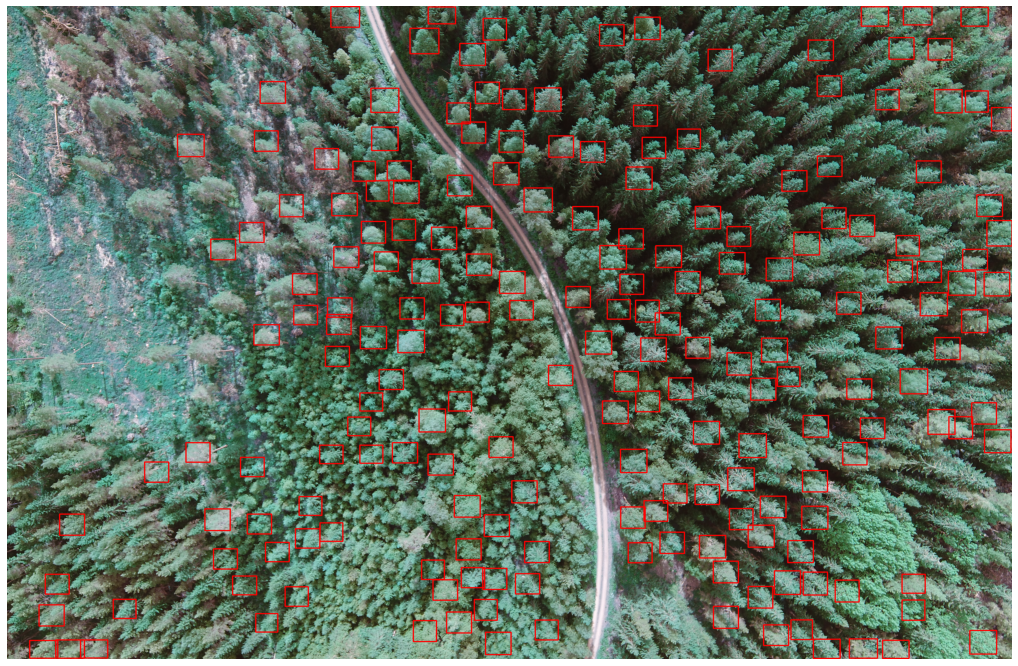

What is the majority of species in the marked areas? skip


In [6]:
plt.figure(figsize = (18,12))
plt.axis('off')
plt.imshow(parent_image, aspect='auto')
plt.show()
species = input("What is the majority of species in the marked areas?") 


In [ ]:
setLabel(species)

In [ ]:
setLabel("pine")

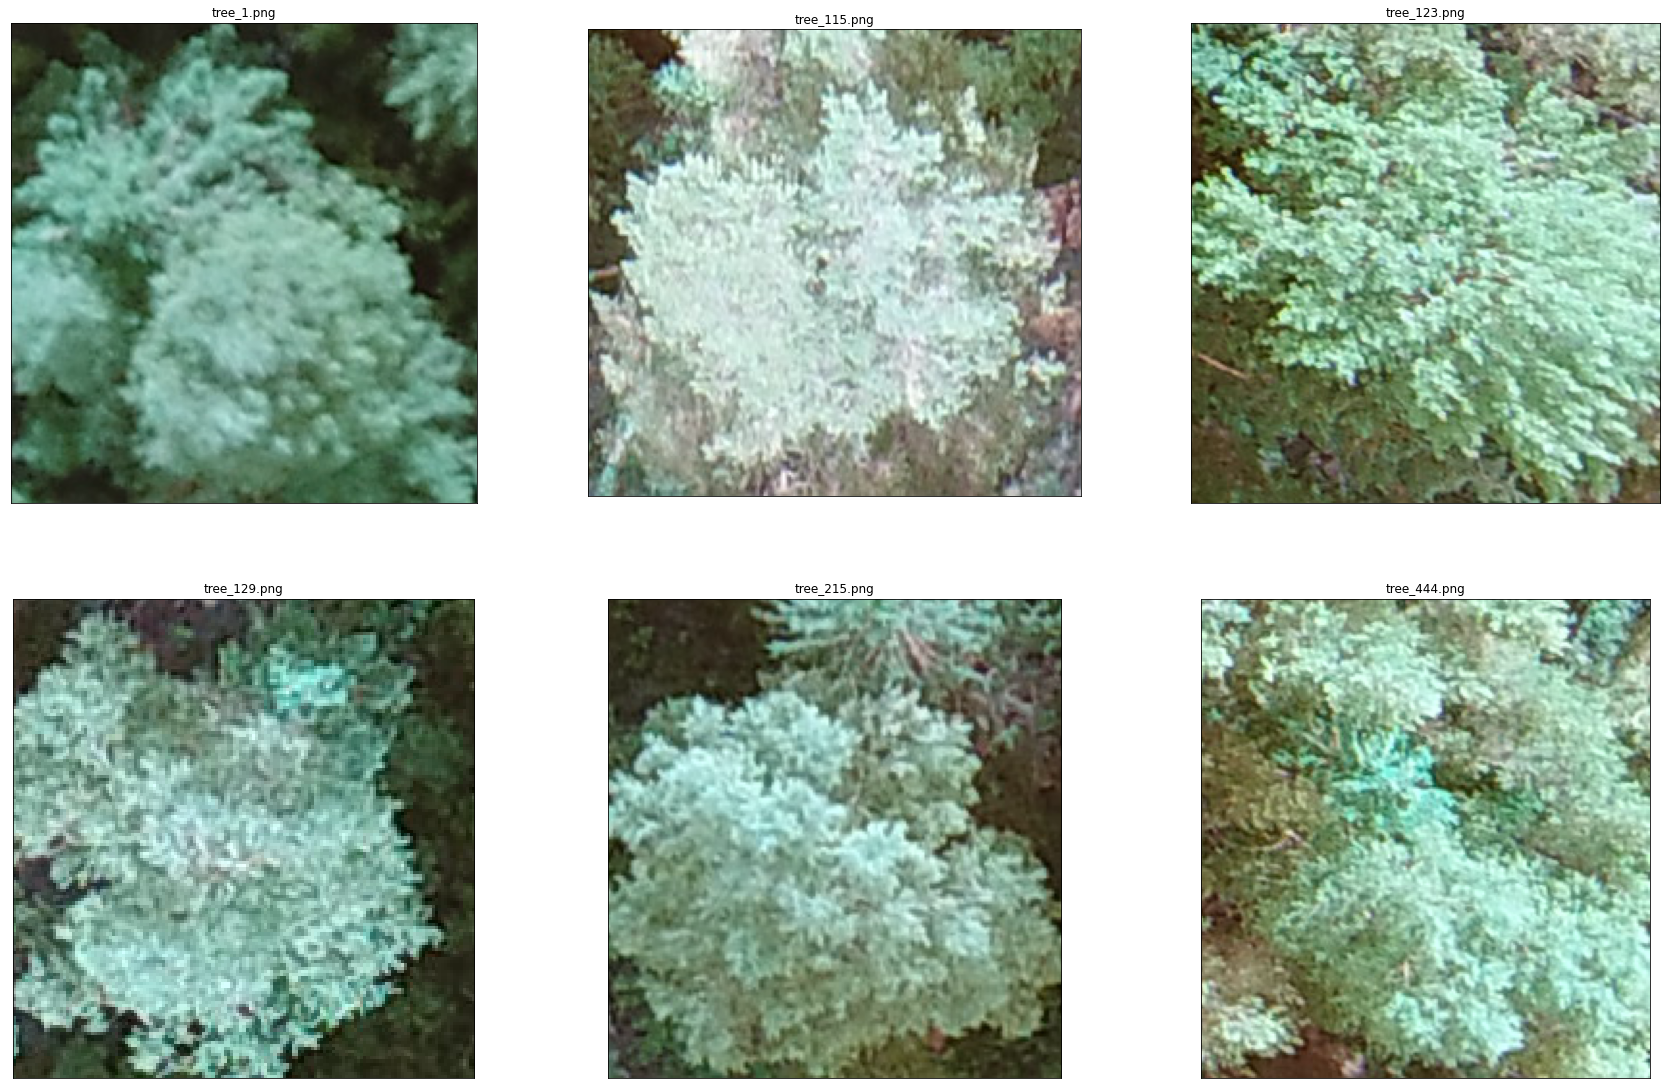

In [13]:
showLabeled('spruce')

In [ ]:
deleteLabeled('spruce', 'tree_444.png')

In [8]:
def setLabel(species):
    if(species == "skip"):
        skipLabel()
        return
    
    
    path = dest + '/' + species
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)
    
    
    for tree in trees:
        from_path = './images_and_json/' + random_image + '/' + tree['tree_name'] + '.png'
        to_path = path + '/' + tree['tree_name'] + '.png'
        print(from_path, to_path)
        shutil.copy(from_path, to_path)
        
    
    
    #for data in data_arr:
    #    from_path = './images/1/' + data[3]
     #   to_path = path + '/' + data[3]
      #  shutil.copy(from_path, to_path)
        
    print('Moved trees to label ' + species)

In [10]:
def showLabeled(label):
    dirpath = dest + '/' + label
    path = dirpath + '/*.png'
    #print(path)
    
    if os.path.exists(dirpath) and os.path.isdir(dirpath):
        if not os.listdir(dirpath):
            print("Directory is empty")
            return
        else:    
            pass
            #print("Directory is not empty")
    else:
        print("Given Directory doesn't exist")
        return
    
    #images = [cv2.imread(file) for file in glob.glob(path)]
    image_filenames = [os.path.basename(file) for file in glob.glob(path)]
    #print(image_filenames)
    images = [cv2.imread(file) for file in glob.glob(path)]
    imgs = []
    for image in image_filenames:
        imgs.append(cv2.imread(dest + '/' + label + '/' + image))
    
    if len(image_filenames) < 1:
        print("No images in folder")
        return
    
    length = math.sqrt(len(image_filenames))
    gridsize = math.ceil(length)
    
    fig, axs = plt.subplots(gridsize, gridsize, figsize=(30,30))
    im = 0
    for i in range(0, gridsize):
        for j in range(0, gridsize):
            
            if im >= len(image_filenames):
                fig.delaxes(axs[i][j])
            else:
                axs[i,j].imshow(images[im])
                axs[i,j].set_title(image_filenames[im])
                axs[i][j].set_xticks([])
                axs[i][j].set_yticks([])
            
                im = im + 1
         

In [11]:
def deleteLabeled(label, img_name):
    path = dest + '/' + label + '/' + img_name
    print(path)
    
    if not os.path.exists(path):
        print("Image doesn't exist")
        return
    try:
        os.remove(path)
        print("Succesfully deleted " + img_name)
    except:
        print("Error, failed to delete " + img_name)

In [12]:
def skipLabel():
    pass